# Importing Nessecary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

In [2]:
#load the Dataset

df = pd.read_csv("Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
#Top 5  Sample

df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
#last 5 sample

df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
#Random 5 sample

df.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
28,CS-97029,B+,B,A-,B+,B-,A,B,D+,A-,...,C+,B+,B,C+,A-,A,B-,B+,A-,3.195
353,CS-97354,B,A,A,B,B+,A,B+,B-,A,...,A+,B-,C+,B-,B,B+,B,A-,NaN,3.387
398,CS-97399,C-,B,A,A-,A-,B-,B+,A,C-,...,A+,B,A-,B,NaN,A-,B,A,B,3.205
195,CS-97196,A,A-,A,A,B+,A,A,A,B+,...,A-,A,A-,B,A-,A-,A-,A-,A,3.705
375,CS-97376,D,C,B,B-,B-,B-,B+,A,D+,...,A-,D+,C,C,NaN,B,C-,A-,C,2.478


# EDA(Exploratory Data Analysis)

In [6]:
#Lets Count the number of Rows and Columns in Dataset
print('Number of rows in dataset:', df.shape[0],"||",'Number of columns in dataset:', df.shape[1]) 

Number of rows in dataset: 571 || Number of columns in dataset: 43


In [7]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Observ:
    
There are 2 types of data found in the dataset

some Null values are found in dataset

In [8]:
#Renaming the columns which can be easy to understand in Analysis

df = df.rename(columns={'HS-105/12':'HS-105','HS-205/20':'HS-205'})

In [9]:
#Removing the columns which is not going to affect the Dataset

df.drop('Seat No.',axis=1 ,inplace=True)    #Seat no wont affect the Analysis

In [10]:
#Checking the Exact count of null values and Summing together 

df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

Observation:
    
Null values found in different columns

<Axes: >

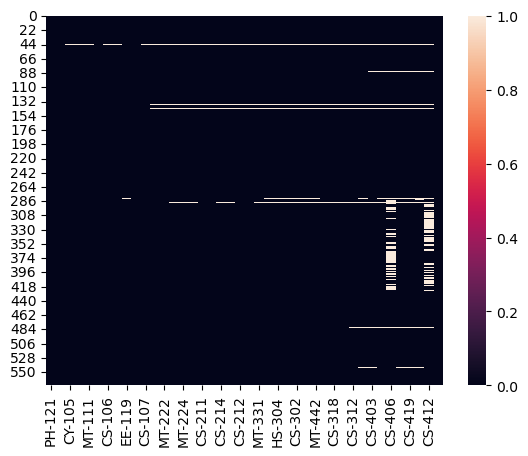

In [11]:
#Lets check the heatmap of null values

sns.heatmap(df.isnull())

Observation:

many columns have null values in it. we can fix them by replacing null values with most frequent value

In [12]:
def replace_null_with_mode(df):
    # Find columns with null values
    columns_with_null = df.columns[df.isnull().any()]

    # Iterate over columns with null values
    for column in columns_with_null:
        # Calculate mode
        mode_value = df[column].mode()[0]

        # Replace null values with mode
        df[column].fillna(mode_value, inplace=True)

    return df

In [13]:
df = replace_null_with_mode(df)

In [14]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [15]:
# Checking null values
df.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

Now the dataset is not having the Null Values

<Axes: >

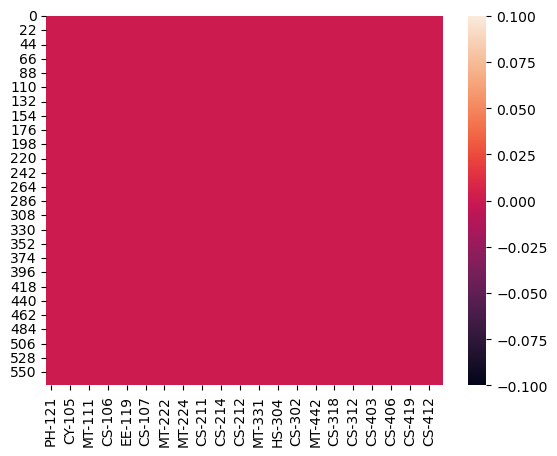

In [16]:
#Same will checck the Null values with Heatmap

sns.heatmap(df.isnull())

In [17]:
#Lets check the Duplicates in the Dataset

duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows in the DataFrame: {duplicates_count}")

Number of duplicate rows in the DataFrame: 0


In [18]:
# checking value counts 
for i in df.columns:
    print(df[i].value_counts())

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU 

Observ:
    
inconsistent grades are present inside the file

In [19]:
#Lets fix the Data

for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [20]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,547,547,547,547,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547
unique,12,12,11,11,12,11,11,11,11,11,...,12,12,12,11,12,12,12,12,12,12
top,A-,A-,A,A,A-,A,A-,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,112,80,174,95,105,148,113,103,134,79,...,120,94,81,134,89,252,179,123,126,223


The count for each categorical variable is 547, indicating that there are no missing values in these columns.
The unique values represent the number of distinct categories present in each categorical variable.
The top value represents the most frequent category in each column, and the freq value shows the frequency of the top category.


Observations:

Among the other categorical variables, "CY-105" has the highest number of unique categories with 13.
The most frequent category among the variables varies. For example, "PH-121" has the most frequent category "A-" occurring 112 times, while "CS-406" has the most frequent category "A-" occurring 262 times.
The range of unique categories and their frequencies may provide insights into the distribution and prevalence of different categorical variables.

# Visualizing The Data

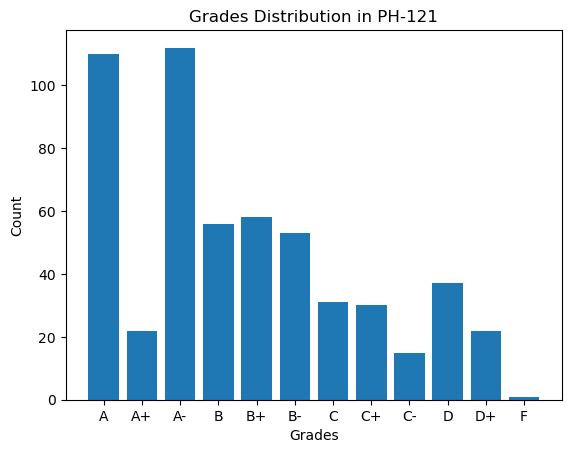

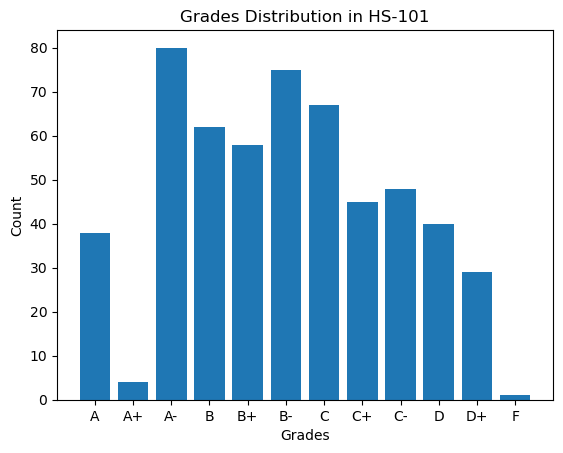

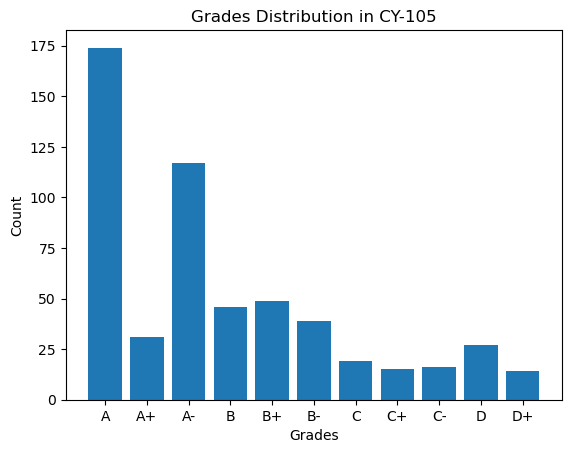

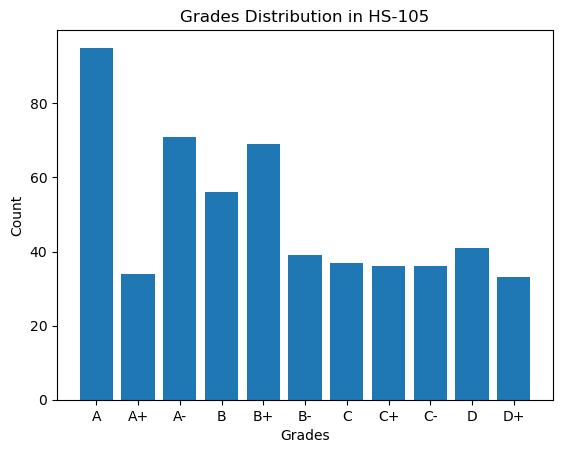

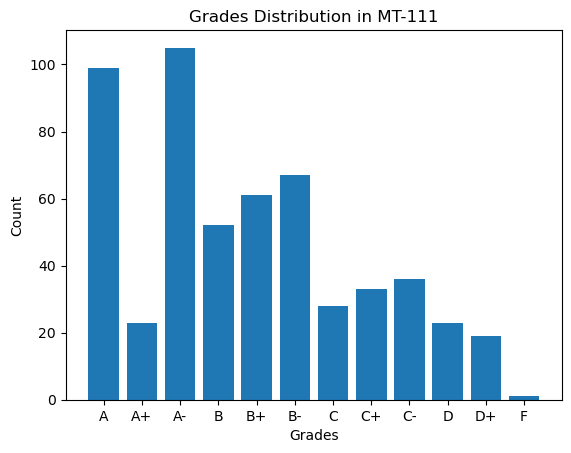

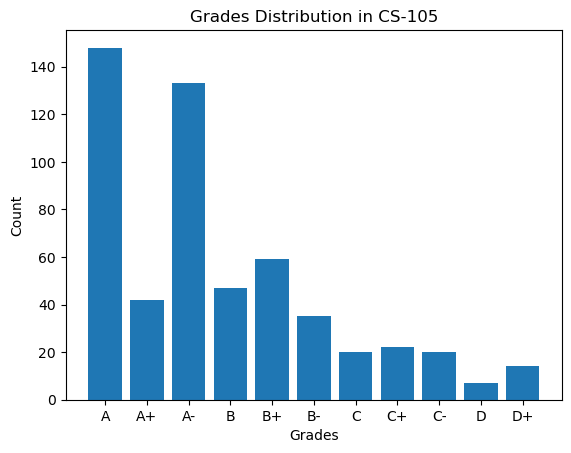

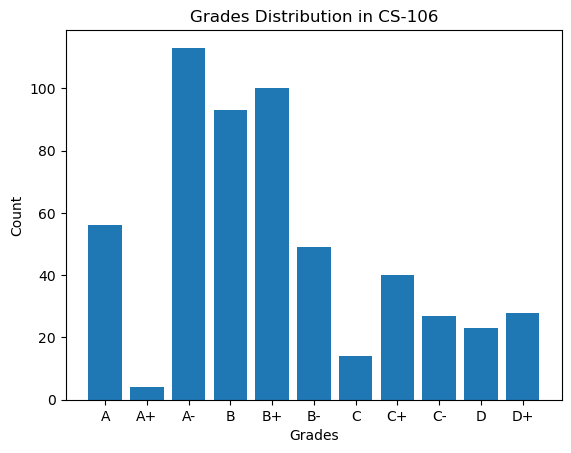

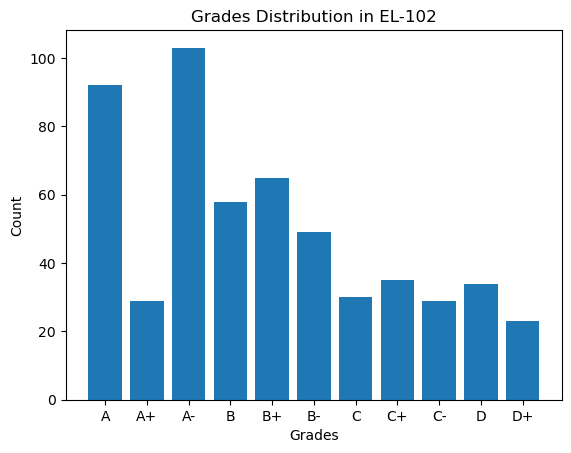

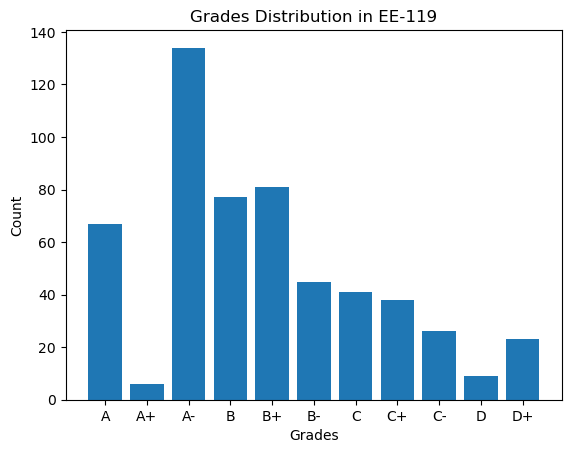

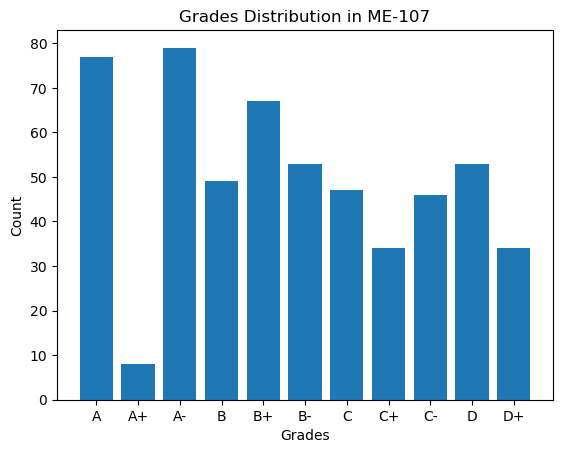

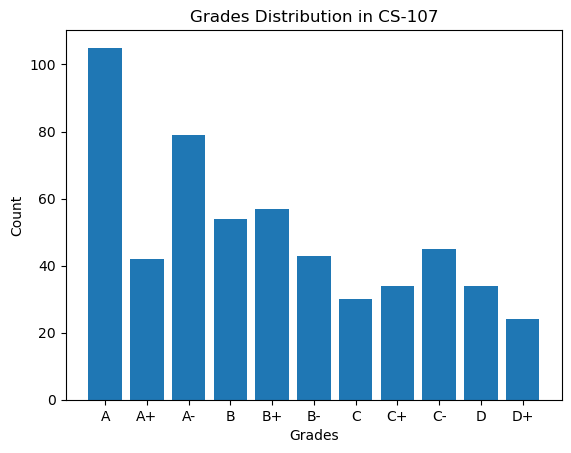

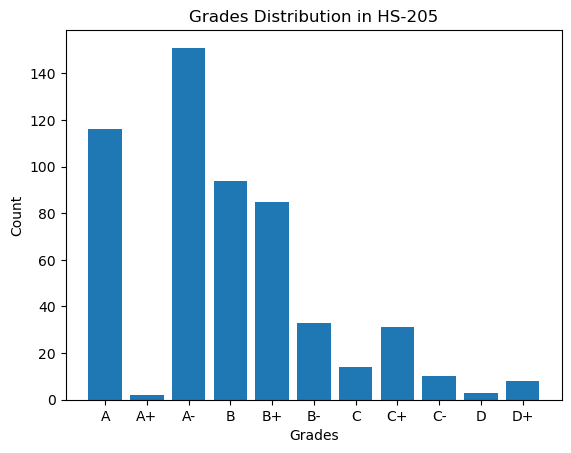

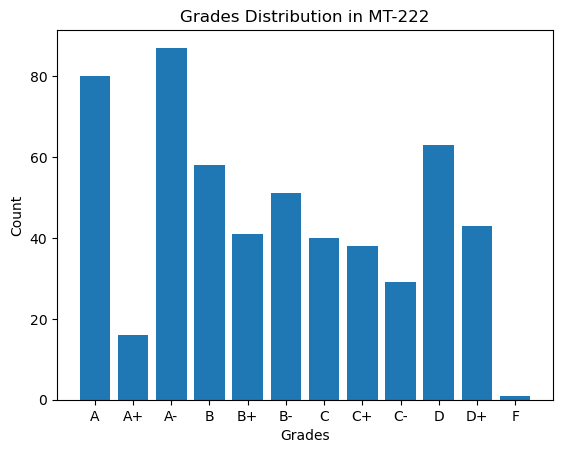

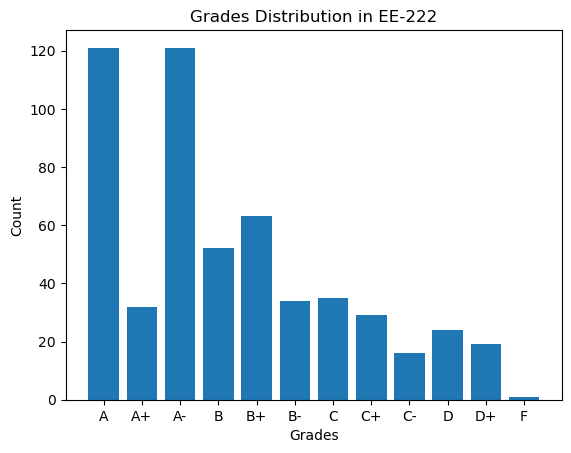

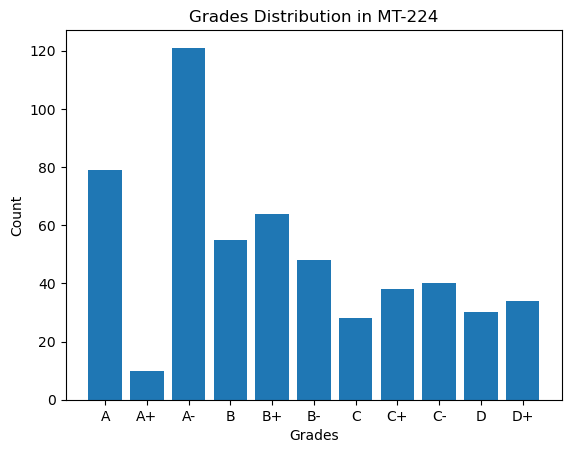

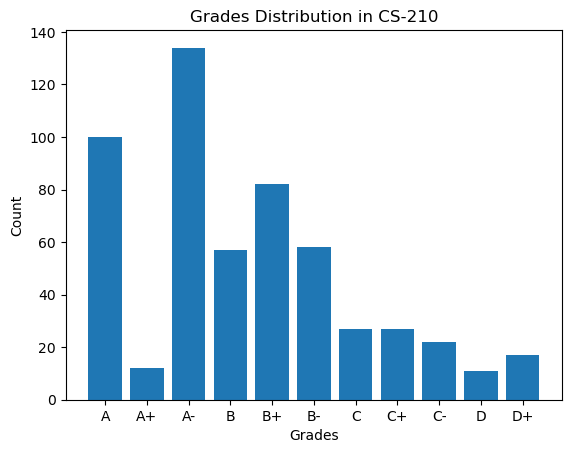

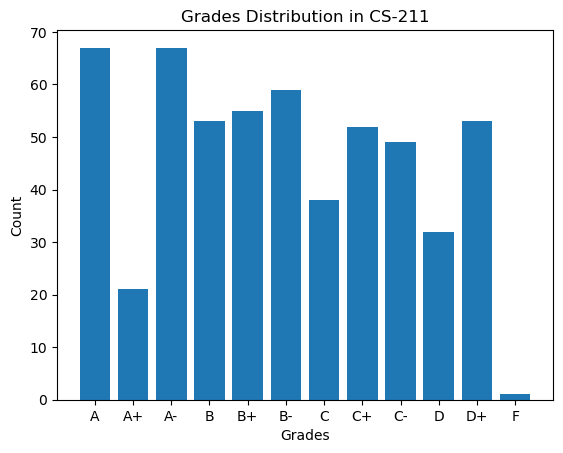

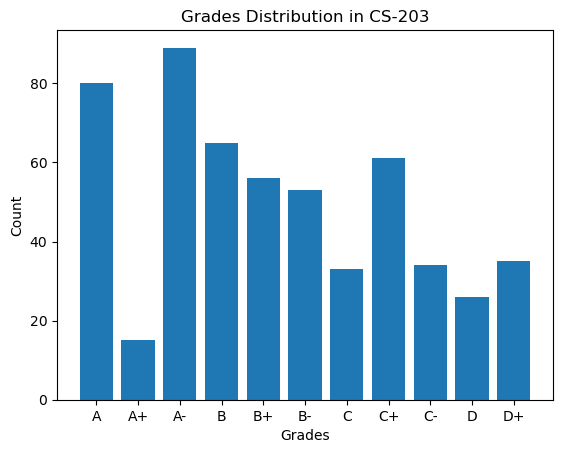

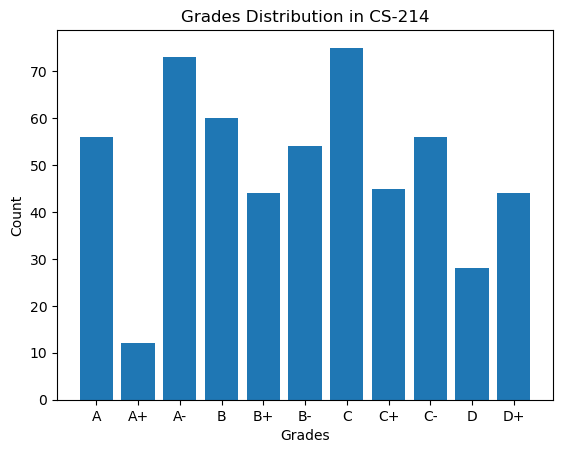

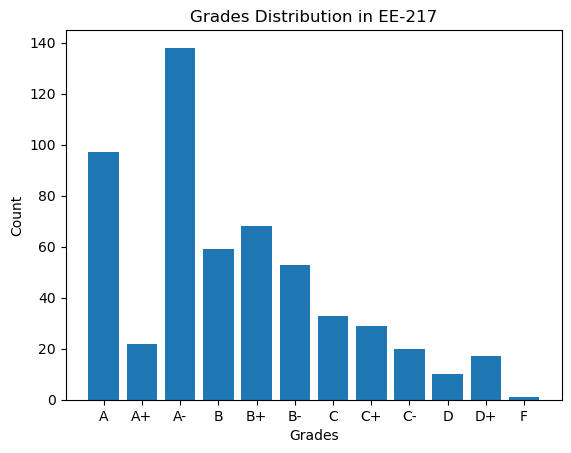

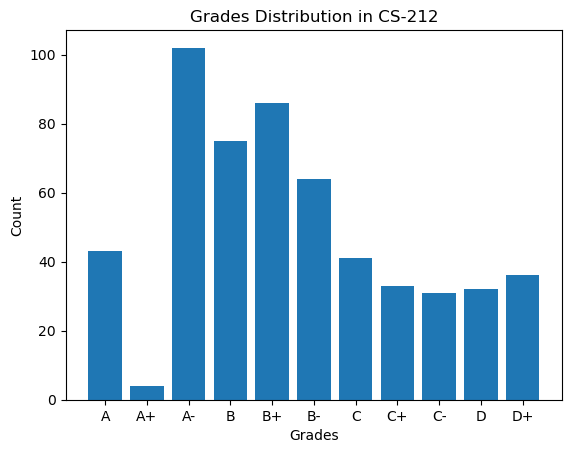

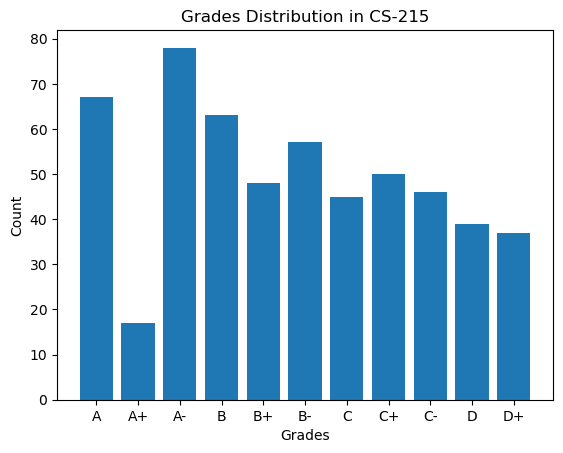

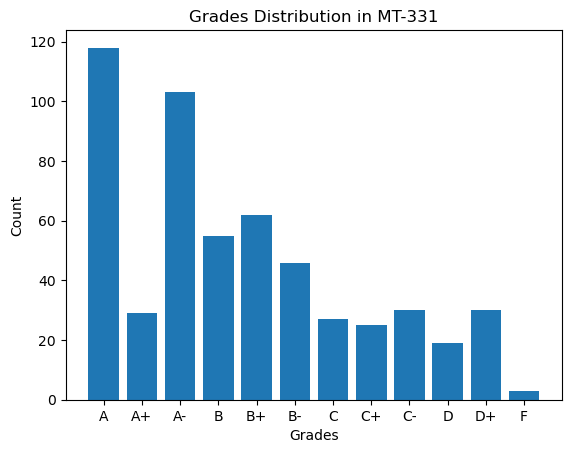

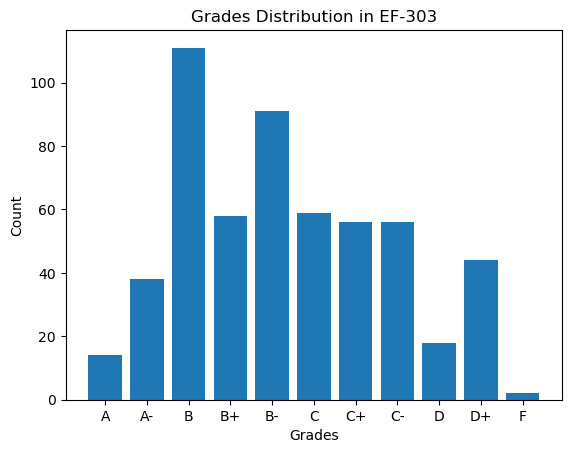

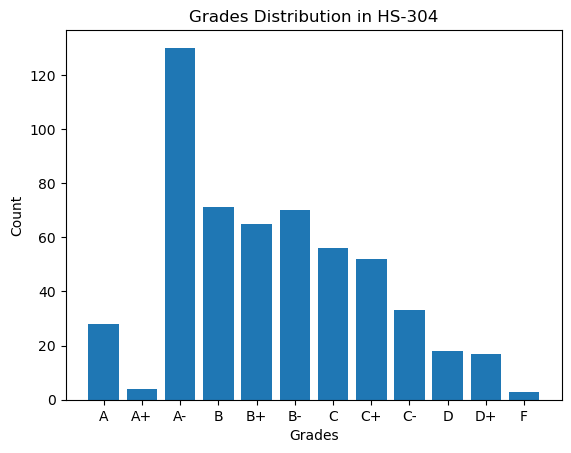

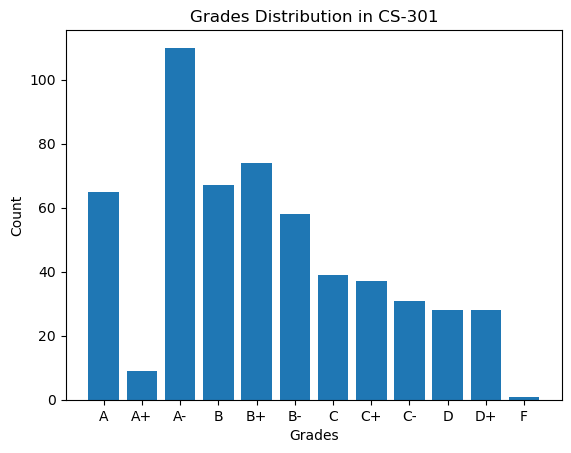

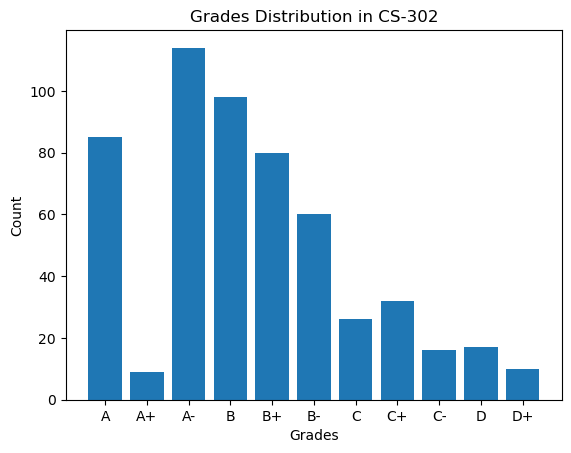

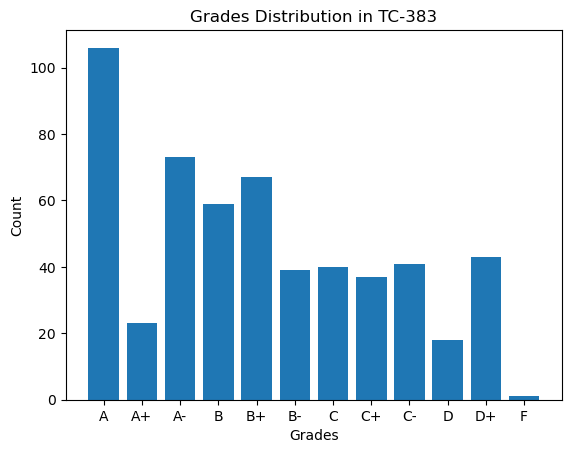

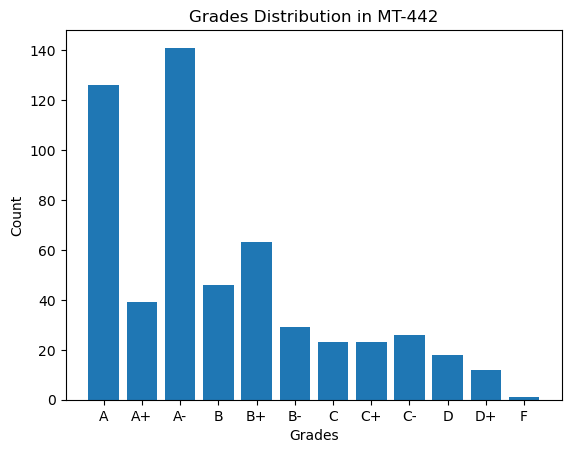

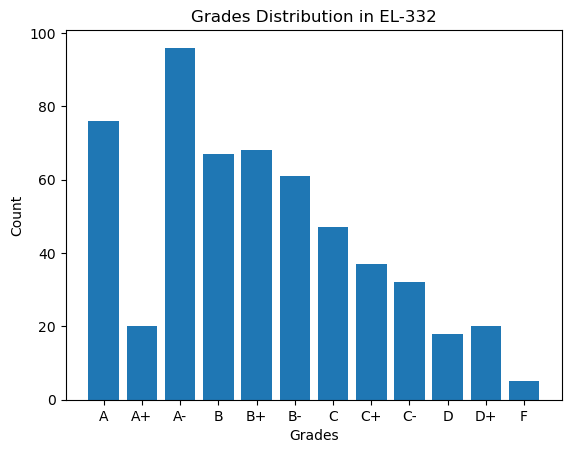

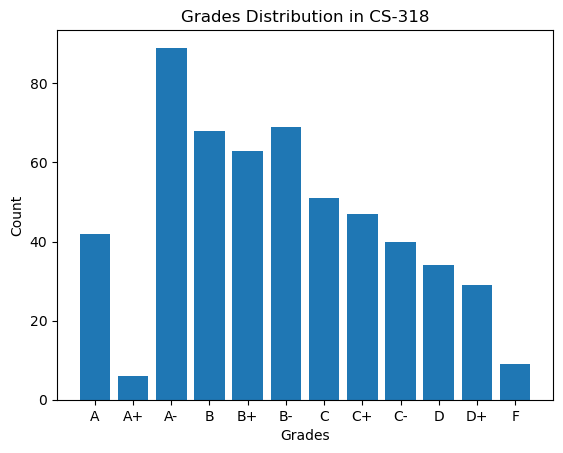

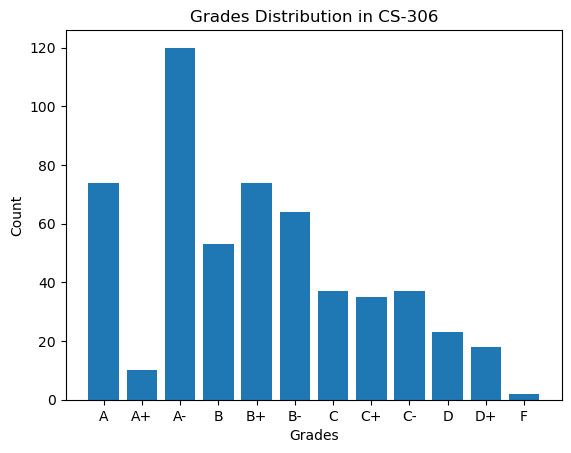

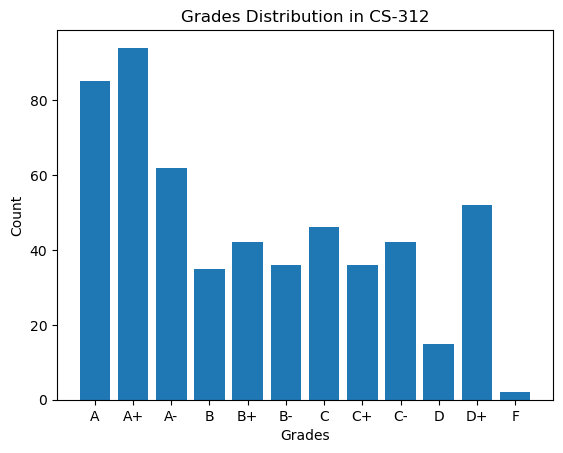

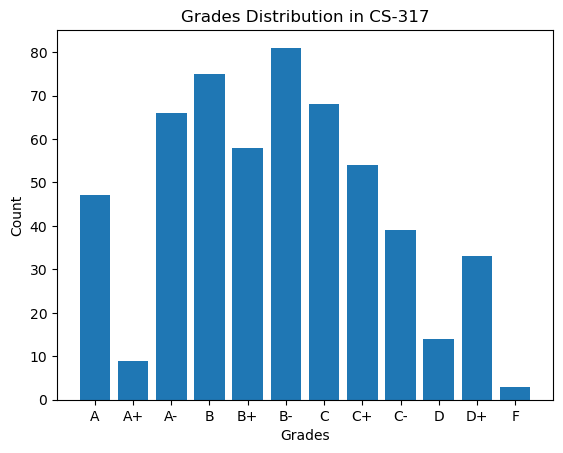

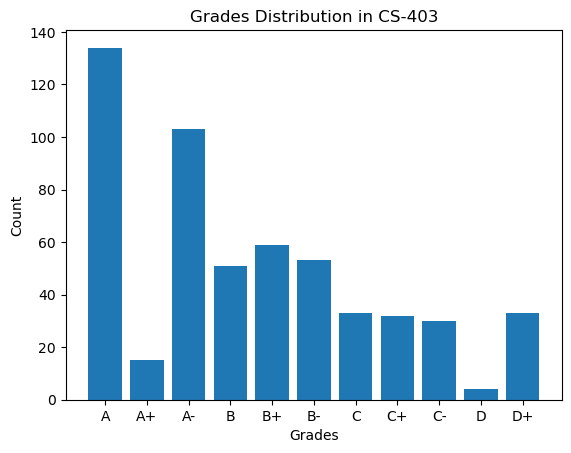

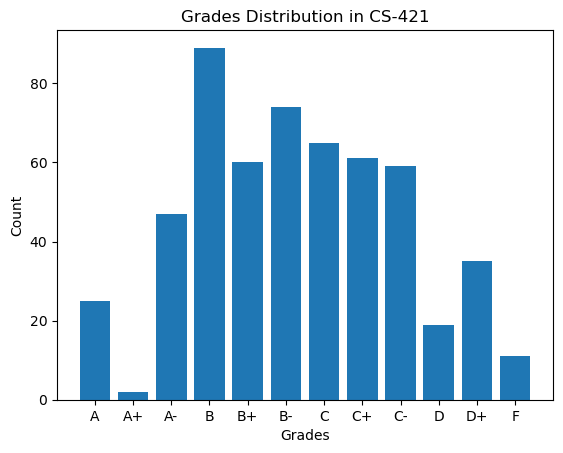

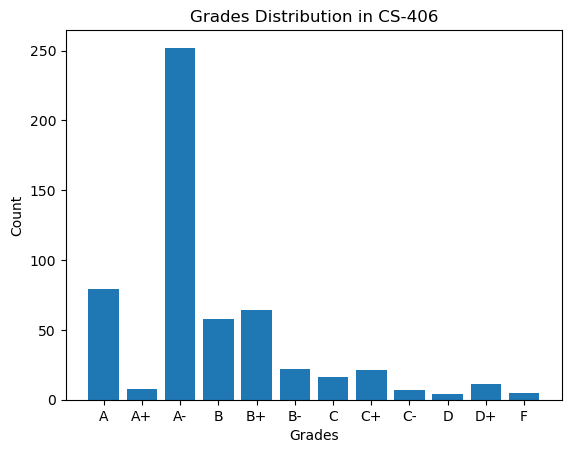

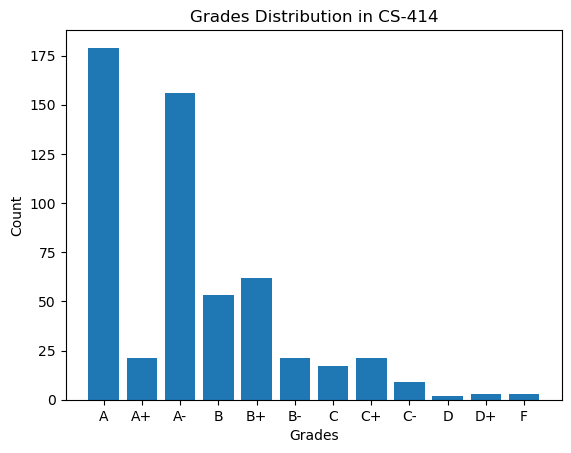

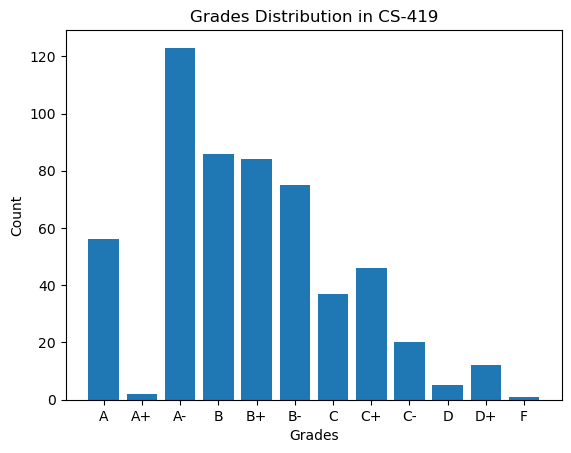

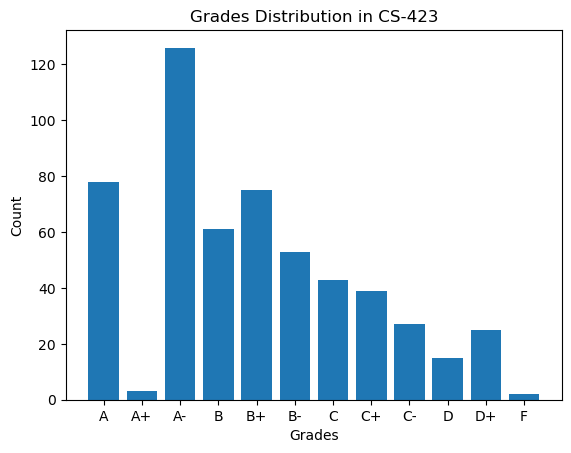

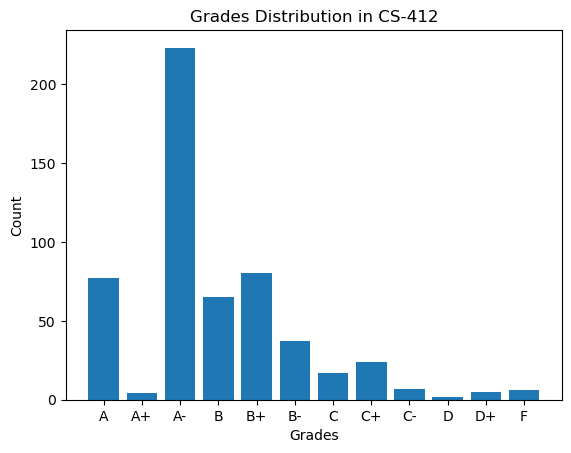

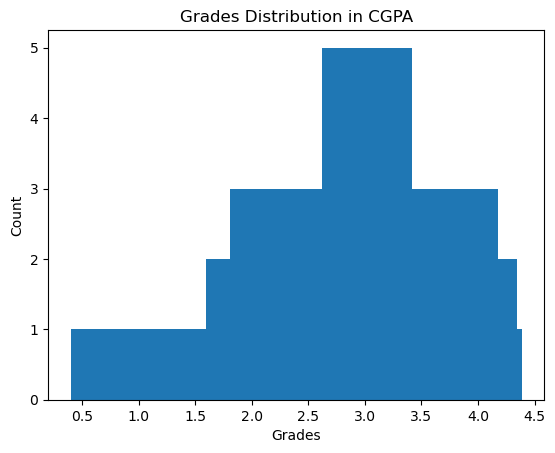

In [21]:
# Bar Chart for grades distribution in each subject
subjects = df.columns  
for subject in subjects:
    grades_count = df[subject].value_counts().sort_index()
    plt.bar(grades_count.index, grades_count.values)
    plt.xlabel('Grades')
    plt.ylabel('Count')
    plt.title(f'Grades Distribution in {subject}')
    plt.show()

In [22]:
#Encoding the categorical values

for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [23]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [24]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

Observation:

there are no null values
all the data types are changed to float values

In [25]:
#descriptive Analysis
df.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.067642,2.657952,3.310055,2.916636,3.047166,3.366728,3.000914,3.019927,3.060878,2.750640,...,2.976234,2.744424,3.140402,2.554662,3.373126,3.491042,3.059232,3.010603,3.342779,2.995388
std,0.936537,0.898506,0.873265,0.988782,0.896047,0.765265,0.827071,0.930312,0.797366,0.995601,...,1.012822,0.845166,0.854419,0.865577,0.704635,0.661342,0.720730,0.860316,0.682592,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.550000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.400000,2.700000,2.400000,3.000000,2.587500
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.058000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

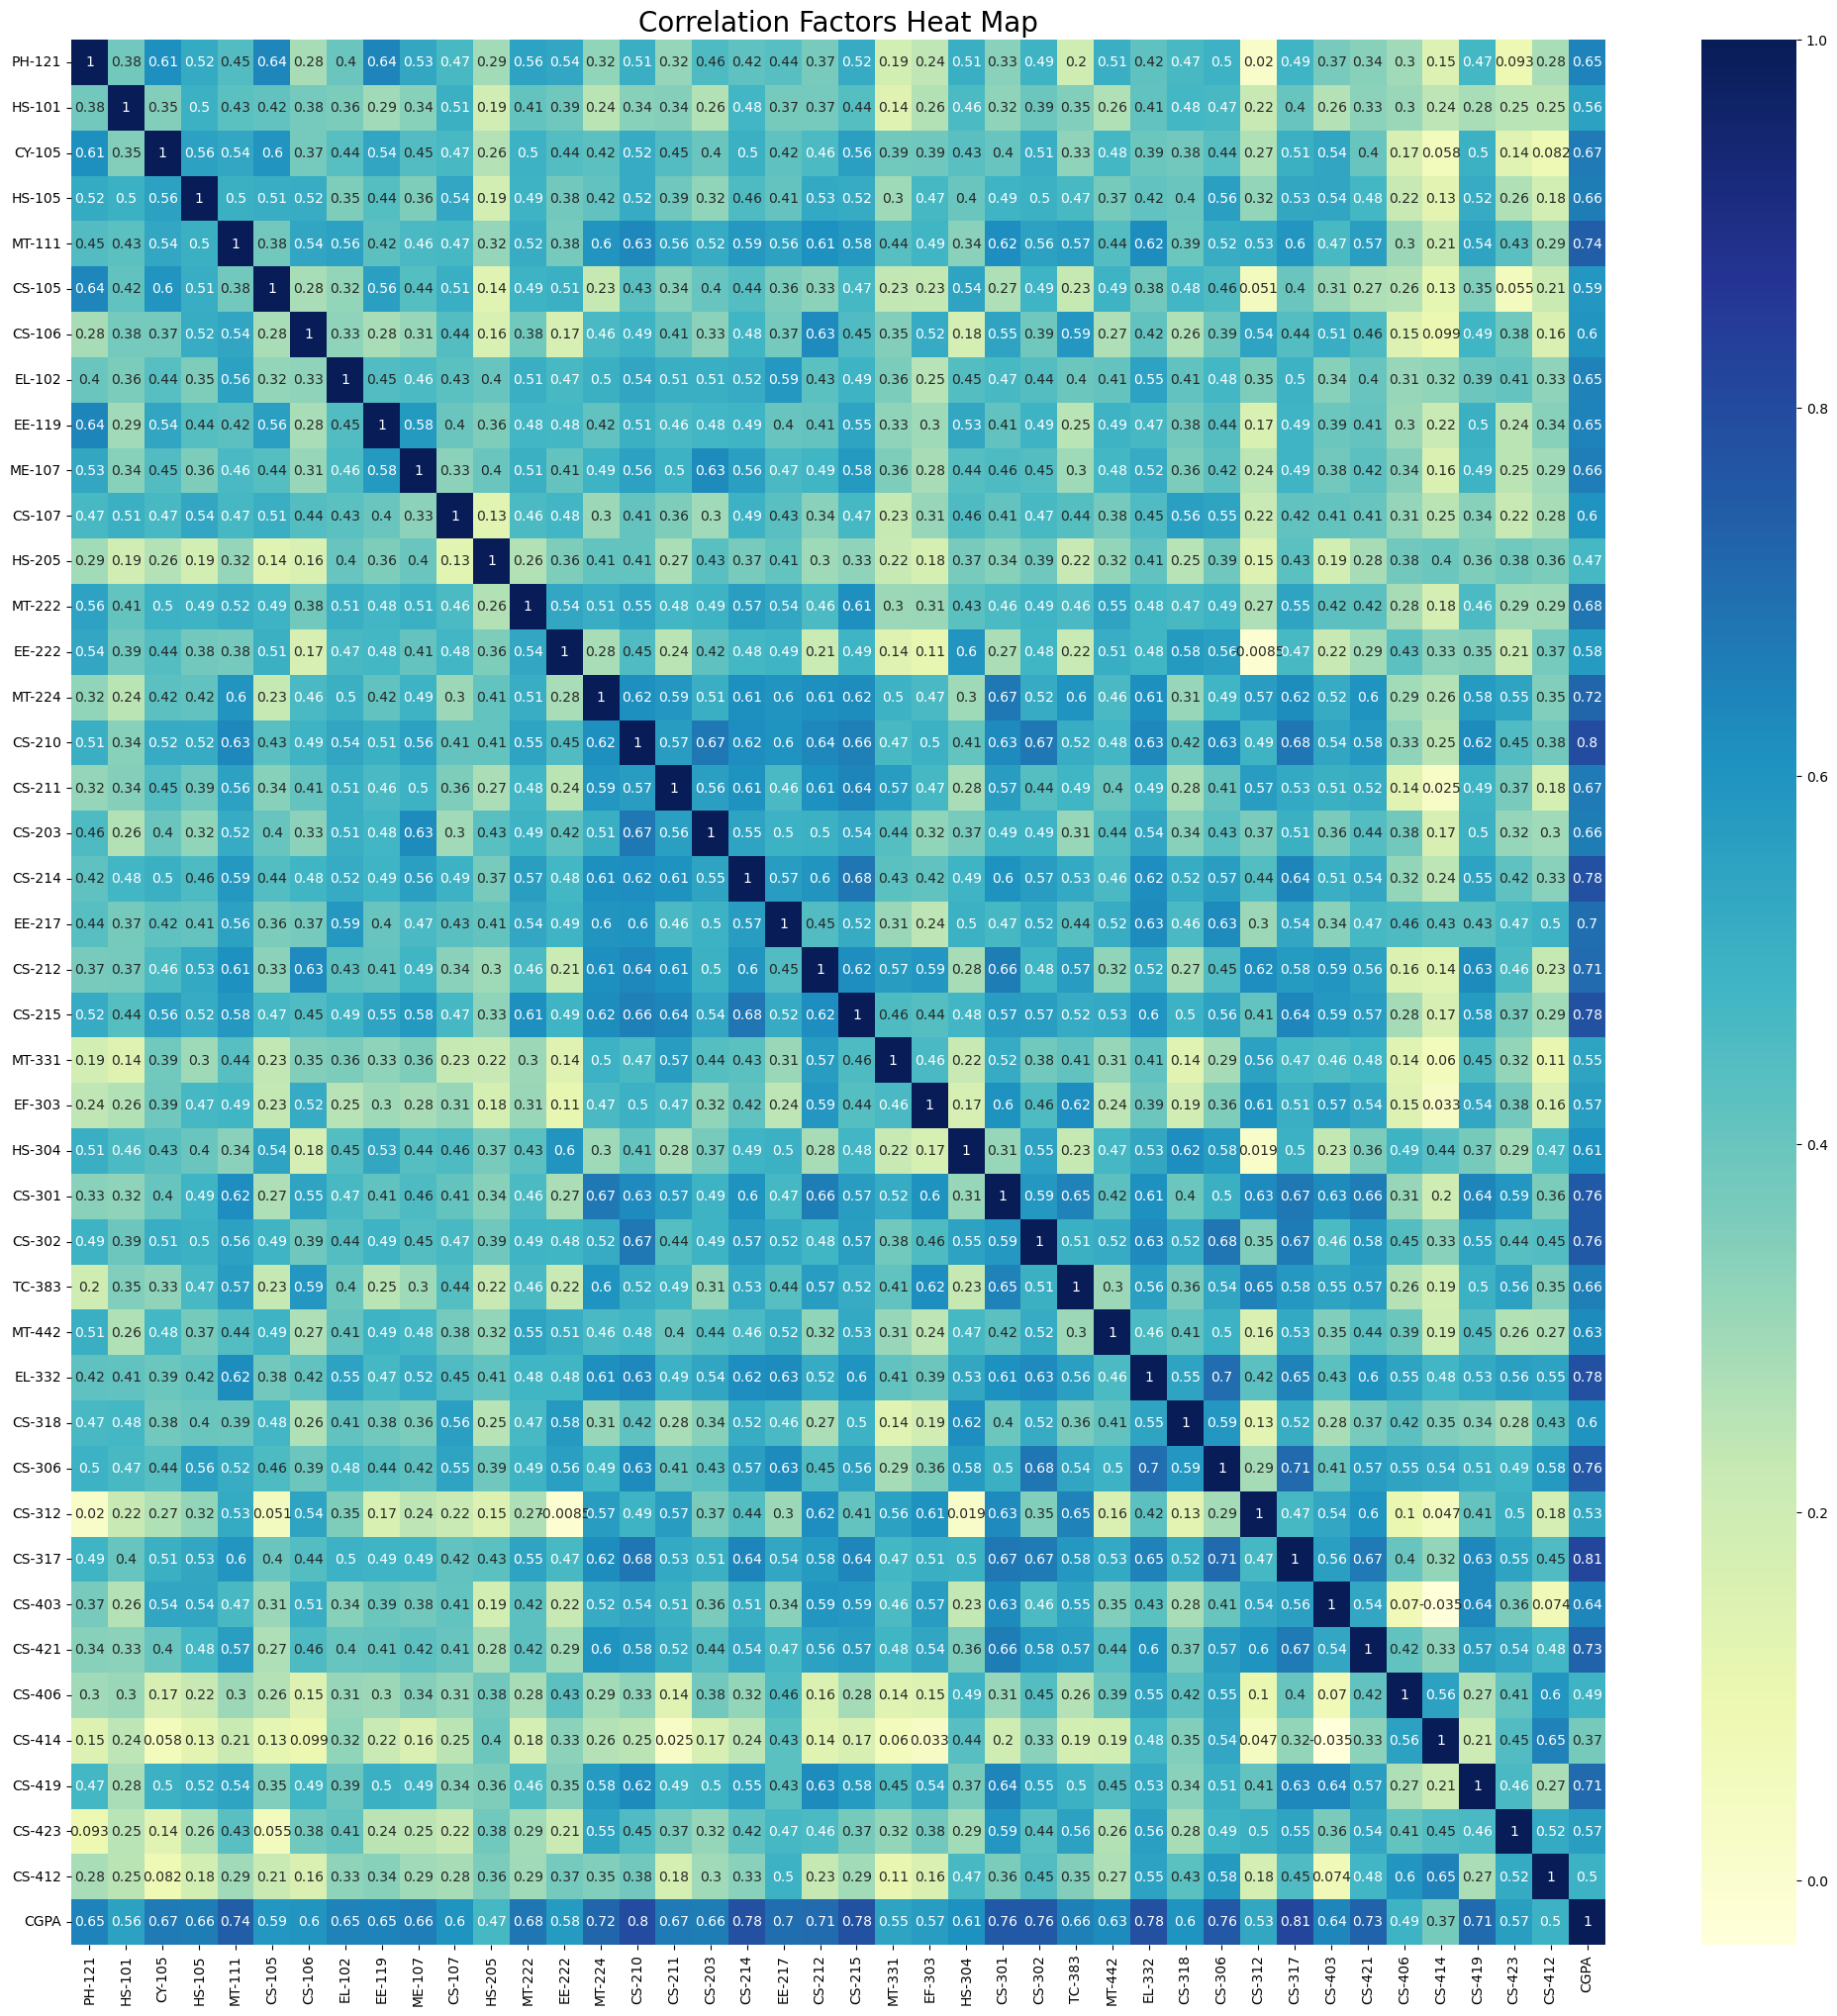

In [26]:
# vasualization of correlation metrix
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

In [27]:
# correlation with label
correlation = df.corr()['CGPA'].drop('CGPA')

# Display the correlation values
print(correlation)

PH-121    0.645401
HS-101    0.556404
CY-105    0.669354
HS-105    0.660944
MT-111    0.738479
CS-105    0.588444
CS-106    0.597217
EL-102    0.651206
EE-119    0.647128
ME-107    0.659035
CS-107    0.601477
HS-205    0.470703
MT-222    0.680591
EE-222    0.577960
MT-224    0.722883
CS-210    0.799214
CS-211    0.672404
CS-203    0.662619
CS-214    0.782109
EE-217    0.699407
CS-212    0.706259
CS-215    0.780897
MT-331    0.550261
EF-303    0.568559
HS-304    0.608500
CS-301    0.755949
CS-302    0.756661
TC-383    0.655092
MT-442    0.626249
EL-332    0.784013
CS-318    0.603264
CS-306    0.758919
CS-312    0.534566
CS-317    0.814143
CS-403    0.639654
CS-421    0.728702
CS-406    0.494329
CS-414    0.370553
CS-419    0.711185
CS-423    0.565454
CS-412    0.495348
Name: CGPA, dtype: float64


In [28]:
#Spliting into feature and label

X = df.drop('CGPA', axis=1) # List of all features
y = df['CGPA'] # Data of our label


X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [29]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
542    3.798
543    3.772
544    3.470
545    2.193
546    1.753
Name: CGPA, Length: 547, dtype: float64

In [30]:
#Feature Scaling

scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.392914,-1.401331,-1.845407,-0.927884,-1.504832,-2.572347,-2.421491,-1.420098,-0.453001,-1.056248,...,-1.112315,-1.261231,-1.236894,-1.687370,-0.988294,0.464315,0.770288,-1.887636,-0.012336,0.523809
1,0.996450,-1.846922,-2.189260,-1.940155,-0.387797,-1.787588,-2.421491,1.054452,-2.084861,-1.759984,...,-2.242188,-1.557704,-2.065892,-1.335933,-1.797744,0.464315,-1.197211,-1.471010,-1.175764,-0.502632
2,0.996450,0.381033,0.790799,-0.219295,0.394128,0.828278,-0.364164,0.408917,0.802276,0.954427,...,0.808468,0.023487,0.302674,1.006982,-0.641387,0.890457,0.770288,1.306493,0.802063,0.963713
3,-2.209774,-0.287353,-2.189260,-1.940155,-2.286756,0.435898,-1.937414,-1.420098,-2.586972,-0.352511,...,-1.451277,-1.557704,-0.881609,-2.038807,-0.988294,-0.956157,-0.743173,-0.915510,-0.710393,-1.382438
4,0.675827,1.160817,0.446946,0.489295,1.064348,0.828278,0.846029,0.408917,1.178859,0.954427,...,0.808468,-0.272987,0.776387,0.304108,0.168063,0.464315,0.770288,0.889867,0.802063,0.963713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.072291,1.495011,0.790799,0.792976,1.064348,0.828278,0.846029,0.731685,1.178859,0.652826,...,0.469506,0.715258,1.131672,1.006982,1.671327,0.890457,-0.137788,0.473242,-0.012336,0.963713
543,0.996450,1.495011,0.790799,1.096658,1.064348,0.828278,1.209086,0.731685,1.178859,1.256029,...,0.808468,0.418784,0.776387,1.006982,1.671327,0.464315,-0.743173,0.889867,-1.175764,0.523809
544,-0.072291,1.495011,0.446946,0.489295,1.064348,0.828278,1.209086,1.054452,1.178859,0.250691,...,0.469506,0.715258,0.302674,1.006982,0.977513,0.890457,-2.256633,0.473242,0.802063,0.523809
545,0.996450,0.826624,-2.647731,1.096658,-2.286756,-2.572347,-0.364164,-1.420098,-0.453001,-1.056248,...,0.469506,-1.953002,0.302674,-0.164475,-0.988294,-3.370961,-2.256633,-0.082259,-0.361364,-1.968976


In [31]:
#Checking Best Random State


maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9875788176922384 on Random_state 46


In [32]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=maxRS)

# Model Training & Testing


Linear Regression

R2 Score: 0.9884894119471499
MAE: 0.05287669778724793
Cross-Validation Scores: [0.98972109 0.97168207 0.77195307 0.97381632 0.97827864]
Mean Cross-Validation Score: 0.9370902366556093


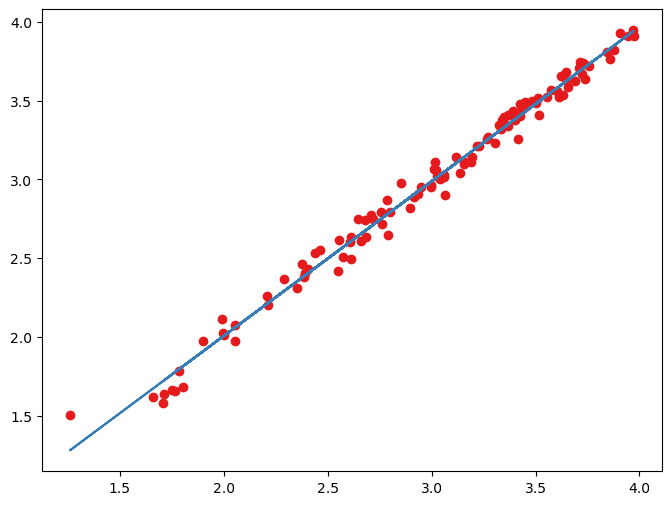

In [33]:
LR = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(LR, X_train, y_train, cv=5, scoring='r2')

# Fit the model on the entire training set
LR.fit(X_train, y_train)

# Predict on the test set
y_pred = LR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

# Plot best fit line
plt.rcParams['figure.figsize'] = (8, 6)
palette = "Set1"
sns.set_palette(palette)

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

# Lasso Regression

In [34]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Lasso regression model
L = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(L, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_L = grid_search.best_estimator_
best_L.fit(X_train, y_train)

# Predict on the test set
y_pred = best_L.predict(X_test)


# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_L, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 0.1}
R2 Score: 0.8979205182363923
MAE: 0.16203976784773086
Cross-Validation Scores: [0.90262411 0.88373868 0.72248202 0.87741962 0.90261066]
Mean Cross-Validation Score: 0.8577750169235688


# Ridge Regression

In [35]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Ridge regression model
R = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(R, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_R = grid_search.best_estimator_
best_R.fit(X_train, y_train)

# Predict on the test set
y_pred = best_R.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_R, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'alpha': 100}
R2 Score: 0.992129009223353
MAE: 0.040878438346774605
Cross-Validation Scores: [0.99406179 0.98239821 0.78052778 0.98514285 0.99237896]
Mean Cross-Validation Score: 0.9469019170790579


# Decision Tree Regressor

In [36]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree Regressor model
DTR = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(DTR, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_DTR = grid_search.best_estimator_
best_DTR.fit(X_train, y_train)

# Predict on the test set
y_pred = best_DTR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_DTR, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
R2 Score: 0.8486967059136209
MAE: 0.1725690800865801
Cross-Validation Scores: [0.82950601 0.65203009 0.58093581 0.83660305 0.75396392]
Mean Cross-Validation Score: 0.7306077782863118


# Extra Tree Regressor

In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Extra Trees Regressor model
ETR = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ETR, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_ETR = grid_search.best_estimator_
best_ETR.fit(X_train, y_train)

# Predict on the test set
y_pred = best_ETR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_ETR, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.954475448336645
MAE: 0.08215123535353563
Cross-Validation Scores: [0.97149911 0.95490805 0.74893033 0.97086103 0.97791609]
Mean Cross-Validation Score: 0.9248229244151412


# XGB Regressor

In [38]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost Regressor model
XGBR = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBR, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_XGBR = grid_search.best_estimator_
best_XGBR.fit(X_train, y_train)

# Predict on the test set
y_pred = best_XGBR.predict(X_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_XGBR, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
R2 Score: 0.9680914803790569
MAE: 0.06646585891897029
Cross-Validation Scores: [0.97257635 0.947726   0.75845435 0.96550984 0.96851745]
Mean Cross-Validation Score: 0.9225568005070667


Based on all these models, accuracy of Linear Regression model is high so we wii save the Linear Regression pkl file for further use.

In [39]:
#Saving model


filename = 'LinearRegression.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [40]:
pickle.dump(scaler, open('scaler.pkl','wb'))